In [1]:
%cd ..

/home/lab-admin/Code/vr-exoskeleton/venv/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/lab-admin/Code/vr-exoskeleton


# scores

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from vr_exoskeleton import data_utils

In [3]:
# Default matplotlib colors.
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [4]:
df = pd.read_csv(data_utils.PATH_SCORES)
df

,User_ID,linear_smooth_pursuit_1,linear_smooth_pursuit_1_max_points,linear_smooth_pursuit_2,linear_smooth_pursuit_2_max_points,linear_smooth_pursuit_3,linear_smooth_pursuit_3_max_points,arc_smooth_pursuit_1,arc_smooth_pursuit_1_max_points,arc_smooth_pursuit_2,...,rapid_visual_search_2,rapid_visual_search_2_max_points,rapid_visual_search_3,rapid_visual_search_3_max_points,rapid_visual_search_avoidance_1,rapid_visual_search_avoidance_1_max_points,rapid_visual_search_avoidance_2,rapid_visual_search_avoidance_2_max_points,rapid_visual_search_avoidance_3,rapid_visual_search_avoidance_3_max_points
0,1,5292,8104,5704,8104,5185,8104,4981,8104,5045,...,73,79,68,71,88,89,98,98,91,91
1,2,6430,8104,6779,8103,6936,8104,6315,8104,6238,...,90,91,87,88,102,103,107,107,108,109
2,3,6570,8104,6891,8104,6669,8104,6561,8104,6761,...,74,78,76,79,85,88,90,91,91,94
3,4,7083,8104,7125,8104,7073,8104,6487,8104,6735,...,88,90,90,91,104,105,94,96,97,97
4,5,6295,8104,6690,8104,6940,8104,6448,8104,7116,...,74,77,68,70,83,87,86,88,87,89
5,6,7458,8104,7598,8104,7602,8104,7061,8104,6921,...,74,78,76,79,90,92,90,92,87,90
6,7,6748,8104,6671,8104,6649,8104,6114,8104,6408,...,81,85,85,87,92,92,97,98,94,95
7,8,7402,8104,6113,8104,6333,8104,6787,8104,6576,...,65,71,76,79,78,82,76,79,87,90
8,9,7339,8104,7169,8104,7266,8104,7151,8104,6786,...,85,87,89,90,103,103,104,104,102,102
9,10,7394,8103,7007,8104,7012,8103,6535,8104,6931,...,85,87,80,83,98,100,103,104,112,112


In [5]:
for i, column in enumerate(df.columns):
    print(f'{i:>2d}: {column:>42}')

 0:                                    User_ID
 1:                    linear_smooth_pursuit_1
 2:         linear_smooth_pursuit_1_max_points
 3:                    linear_smooth_pursuit_2
 4:         linear_smooth_pursuit_2_max_points
 5:                    linear_smooth_pursuit_3
 6:         linear_smooth_pursuit_3_max_points
 7:                       arc_smooth_pursuit_1
 8:            arc_smooth_pursuit_1_max_points
 9:                       arc_smooth_pursuit_2
10:            arc_smooth_pursuit_2_max_points
11:                       arc_smooth_pursuit_3
12:            arc_smooth_pursuit_3_max_points
13:                      rapid_visual_search_1
14:           rapid_visual_search_1_max_points
15:                      rapid_visual_search_2
16:           rapid_visual_search_2_max_points
17:                      rapid_visual_search_3
18:           rapid_visual_search_3_max_points
19:            rapid_visual_search_avoidance_1
20: rapid_visual_search_avoidance_1_max_points
21:          

In [6]:
S = df.to_numpy()[:, 1:]  # Drop 'User_ID'.
S[:5, :5]

array([[5292, 8104, 5704, 8104, 5185],
       [6430, 8104, 6779, 8103, 6936],
       [6570, 8104, 6891, 8104, 6669],
       [7083, 8104, 7125, 8104, 7073],
       [6295, 8104, 6690, 8104, 6940]])

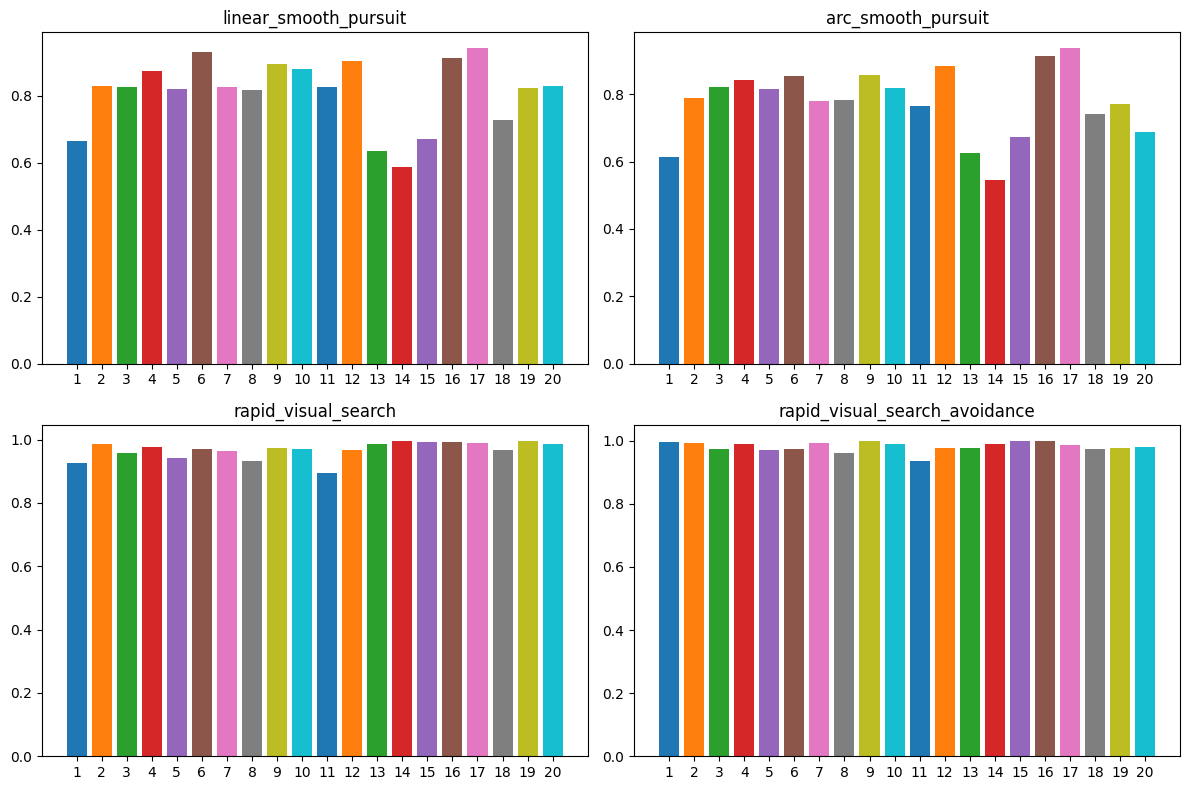

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i in range(4):  # Tasks.
    S_task = S[:, 6 * i:6 * i + 6]
    s = S_task[:, ::2].sum(axis=1) / S_task[:, 1::2].sum(axis=1)
    ax = axes[i // 2][i % 2]
    x = np.arange(len(s))
    ax.bar(x, s, color=colors)
    ax.set_title(df.columns[1 + 6 * i][:-2])
    ax.set_xticks(x, [str(v + 1) for v in x])
plt.tight_layout()
plt.show()